# Name of the Author : KILINDO BULAMBO Vainqueur

# Data dictionary

Ship Mode : Shipment of the product 
Segment : Segmentation of customers
Country : Country where products were purchased
City : City where products were purchased
State : State where products were purchased
Postal Code	: Postal of Code the state
Region : Region of the state
Category : Category of products
Sub-Category : Sub-Category	 of products 
Sales : Amount of sales
Quantity : Quantity of products purchased
Discount : Discount made while purchasing
Profit : Profit made per purchasing 

# Libraries importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Importing the data set in csv file format

In [3]:
data = pd.read_csv('/home/irvainqueur/Documents/Sparks Foundation Tasks/SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# Checking Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# EDA

In [12]:
potential_states_profit = data.groupby('State')['Profit'].sum().sort_values()
potential_states_profit.describe()

count       49.000000
mean      5844.837178
std      17468.637186
min     -25729.356300
25%        230.149700
50%       2196.102300
75%       7285.629300
max      76381.387100
Name: Profit, dtype: float64

We can see that the average profit that a state bring to the company is around 5845, let look at the states that bring less that the average profit.

<AxesSubplot:xlabel='State'>

<Figure size 1296x720 with 0 Axes>

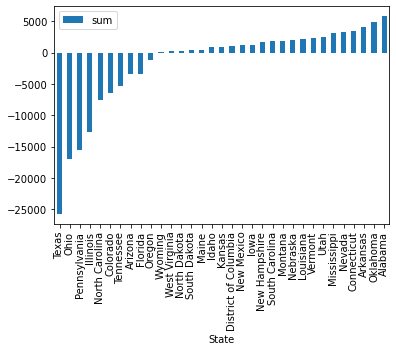

In [13]:
potential_states_profit = data.groupby('State')['Profit'].agg(["sum"]).sort_values(by=['sum'])
potential_states_profit = potential_states_profit.loc[potential_states_profit['sum'] < 5844.837178]

plt.figure(figsize = (18,10))
potential_states_profit.plot(kind='bar')

The plot above shows the states which gave profit less than the average profit of all the states, these state need more marketing campaign. We can see that some of them have negative profit.

Let's see the belonging region for all this negative profit states and Region for countries having positive profit but less that average of all the countries profit

<AxesSubplot:xlabel='State,Region'>

<Figure size 1296x720 with 0 Axes>

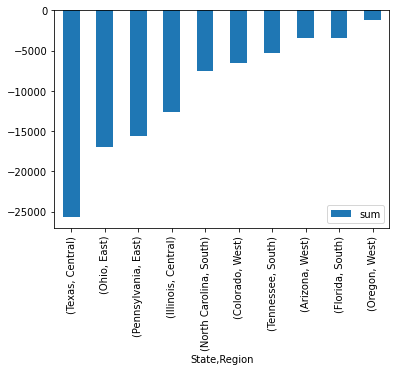

<Figure size 1296x720 with 0 Axes>

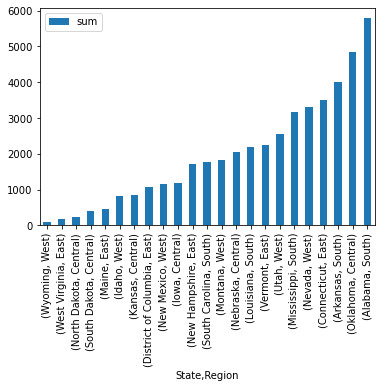

In [14]:
potential_region_profit = data.groupby(['State','Region'])['Profit'].agg(["sum"]).sort_values(by=['sum'])
potential_region_profit_neg = potential_region_profit.loc[potential_region_profit['sum'] < 0]

potential_region_profit_pos = potential_region_profit.loc[(potential_region_profit['sum'] >= 0) & 
                                                          (potential_region_profit['sum'] < 5844.837178)]

plt.figure(figsize = (18,10))
potential_region_profit_neg.plot(kind='bar')

plt.figure(figsize = (18,10))
potential_region_profit_pos.plot(kind='bar')

We can see that Contries which made negative profit with their respective region 

<AxesSubplot:xlabel='Region'>

<Figure size 1296x720 with 0 Axes>

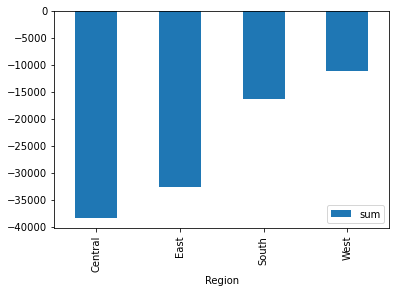

<Figure size 1296x720 with 0 Axes>

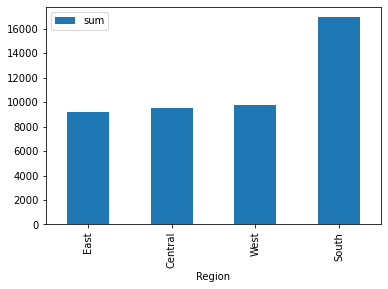

In [15]:
potential_region_profit_grped_reg_neg = potential_region_profit_neg.groupby('Region')['sum'].agg(["sum"]).sort_values(by=['sum'])


potential_region_profit_grped_reg_pos = potential_region_profit_pos.groupby('Region')['sum'].agg(["sum"]).sort_values(by=['sum'])


plt.figure(figsize = (18,10))
potential_region_profit_grped_reg_neg.plot(kind='bar')

plt.figure(figsize = (18,10))
potential_region_profit_grped_reg_pos.plot(kind='bar')

Most of the negative profit have been observed in central, East, South and West respectively. While positive profit were observed in South, West, Central and East respectively

<AxesSubplot:xlabel='Region'>

<Figure size 1296x720 with 0 Axes>

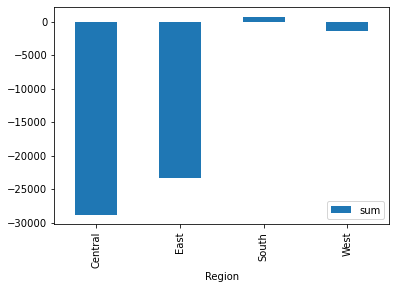

In [19]:
result = potential_region_profit_grped_reg_pos.sort_values(by=['Region']) + potential_region_profit_grped_reg_neg.sort_values(by=['Region'])

plt.figure(figsize = (18,10))
result.plot(kind='bar')

Combining their respective positive and negative values, we can see that only South did well, others still have negative value.

,sum
count,4.000000
mean,71599.255425
std,33601.935795
min,39706.362500
25%,44988.663350
50%,69136.105150
75%,95746.697225
max,108418.448900


<Figure size 1296x720 with 0 Axes>

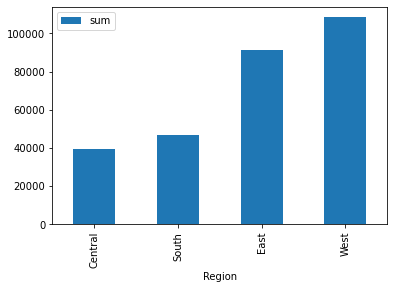

In [21]:
region_profits = data.groupby('Region')['Profit'].agg(["sum"]).sort_values(by=['sum'])

plt.figure(figsize = (18,10))
region_profits.plot(kind='bar')


region_profits.describe()

The plot above shows the profit made by each region. We miss North region, This region need some particulier approaches such as marketing campaign, promotion. Central and South did not achieve the average profit which is 71599.255425.

In [36]:
potential_city_profit = data.groupby('City')['Profit'].agg(["sum"]).sort_values(by=['sum'])
potential_city_profit.describe()

,sum
count,531.000000
mean,539.354090
std,3676.603852
min,-13837.767400
25%,4.176100
50%,73.352900
75%,346.774250
max,62036.983700


Only 531 cities made profit to the company with an average of 539 of profit per city. The city which made the maxium of profit has around 62037 and the one which made the worst profit has around -13838. The difference is very exaustive nacessaries strategies need to be taken for these cities. Let's see the cities that made the negative profit.

In [42]:
potential_city_profit = potential_city_profit.loc[potential_city_profit['sum'] < 0]
potential_city_profit['sum']

City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
                   ...    
Ormond Beach       -1.9656
Pensacola          -1.4760
Elyria             -1.3984
Altoona            -1.1835
Hickory            -1.0956
Name: sum, Length: 116, dtype: float64

In [60]:
potential_region_profit = data.groupby(['Region','Category','Sub-Category'])['Profit'].agg(["sum"]).sort_values(by=['sum'])
potential_region_profit.sort_values(by=['Region','Category']).head(60)

sum
Region  Category        Sub-Category            
Central Furniture       Furnishings   -3906.2168
                        Tables        -3559.6504
                        Bookcases     -1997.9043
                        Chairs         6592.7221
        Office Supplies Appliances    -2638.6175
                        Binders       -1043.6369
                        Supplies       -661.8881
                        Fasteners       236.6186
                        Labels         1073.0794
                        Art            1195.1591
                        Envelopes      1777.5283
                        Storage        1969.8365
                        Paper          6971.9005
        Technology      Machines      -1486.0666
                        Accessories    7251.6306
                        Phones        12323.0267
                        Copiers       15608.8413
East    Furniture       Tables       -11025.3801
                        Bookcases     -1167.6318
                        Furnishings    5881.4071
                        Chairs         9357.7706
        Office Supplies Supplies      -1155.1352
                        Fasteners       263.9908
                        Labels         1129.2800
                        Envelopes      1812.4090
                        Art            1899.9443
                        Storage        8389.3712
                        Appliances     8391.4134
                        Paper          9015.3710
                        Binders       11267.9346
        Technology      Machines       6928.6429
                        Accessories   11195.8644
                        Phones        12314.6860
                        Copiers       17022.8418
South   Furniture       Tables        -4623.0579
                        Bookcases      1339.4918
                        Furnishings    3442.6829
                        Chairs         6612.0893
        Office Supplies Supplies          1.8773
                        Fasteners       173.7181
                        Labels         1040.7723
                        Art            1058.5866
                        Envelopes      1465.4770
                        Storage        2274.2965
                        Binders        3900.6640
                        Appliances     4123.9396
                        Paper          5947.0614
        Technology      Machines      -1438.8930
                        Copiers        3658.9067
                        Accessories    7004.5424
                        Phones        10767.2753
West    Furniture       Bookcases     -1646.5117
                        Tables         1482.6073
                        Chairs         4027.5843
                        Furnishings    7641.2704
        Office Supplies Fasteners       275.1907
                        Supplies        626.0465
                        Envelopes      1908.7624
                        Labels         2303.1223
                        Art            2374.0970

In [61]:
potential_region_profit.sort_values(by=['Region','Category']).tail(10)

sum
Region Category        Sub-Category            
West   Office Supplies Labels         2303.1223
                       Art            2374.0970
                       Appliances     8261.2699
                       Storage        8645.3222
                       Paper         12119.2364
                       Binders       16096.8016
       Technology      Machines       -618.9264
                       Phones         9110.7426
                       Accessories   16484.5983
                       Copiers       19327.2351

In [63]:
potential_region_profit = data.groupby(['Region','Category','Sub-Category'])['Sales'].agg(["sum"]).sort_values(by=['sum'])
potential_region_profit.sort_values(by=['Region','Category']).head(60)

sum
Region  Category        Sub-Category             
Central Furniture       Furnishings    15254.3700
                        Bookcases      24157.1768
                        Tables         39154.9710
                        Chairs         85230.6460
        Office Supplies Fasteners        778.0300
                        Labels          2451.4720
                        Envelopes       4636.8720
                        Art             5765.3400
                        Supplies        9467.3720
                        Paper          17491.9020
                        Appliances     23582.0330
                        Storage        45930.1120
                        Binders        56923.2820
        Technology      Machines       26797.3840
                        Accessories    33956.0760
                        Copiers        37259.5700
                        Phones         72403.2820
East    Furniture       Furnishings    29071.3800
                        Tables         39139.8070
                        Bookcases      43819.3340
                        Chairs         96260.6830
        Office Supplies Fasteners        819.7180
                        Labels          2602.9340
                        Envelopes       4375.8740
                        Art             7485.7640
                        Supplies       10760.1160
                        Paper          20172.6020
                        Appliances     34188.4660
                        Binders        53497.9970
                        Storage        71612.5840
        Technology      Accessories    45033.3720
                        Copiers        53219.4620
                        Machines       66106.1650
                        Phones        100614.9820
South   Furniture       Bookcases      10899.3620
                        Furnishings    17306.6840
                        Tables         43916.1920
                        Chairs         45176.4460
        Office Supplies Fasteners        503.3160
                        Labels          2353.1800
                        Envelopes       3345.5560
                        Art             4655.6220
                        Supplies        8318.9280
                        Paper          14150.9840
                        Appliances     19525.3260
                        Storage        35768.0600
                        Binders        37030.3410
        Technology      Copiers         9299.7560
                        Accessories    27276.7540
                        Machines       53890.9600
                        Phones         58304.4380
West    Furniture       Furnishings    30072.7300
                        Bookcases      36004.1235
                        Tables         84754.5620
                        Chairs        101781.3280
        Office Supplies Fasteners        923.2160
                        Envelopes       4118.1000
                        Labels          5078.7260
                        Art             9212.0660
                        Supplies       18127.1220

In [64]:
potential_region_profit.sort_values(by=['Region','Category']).tail(10)

sum
Region Category        Sub-Category           
West   Office Supplies Art            9212.066
                       Supplies      18127.122
                       Paper         26663.718
                       Appliances    30236.336
                       Binders       55961.113
                       Storage       70532.852
       Technology      Machines      42444.122
                       Copiers       49749.242
                       Accessories   61114.116
                       Phones        98684.352

In [68]:
potential_shipmode_profit = data.groupby(['Region','Ship Mode'])['Profit'].agg(["sum"]).sort_values(by=['sum'])
potential_shipmode_profit.sort_values(by=['Region'])

sum
Region  Ship Mode                 
Central Same Day         1531.8797
        First Class      3707.2672
        Second Class     9114.8349
        Standard Class  25352.3807
East    Same Day         7980.2670
        Second Class    10787.2908
        First Class     15732.0141
        Standard Class  57023.2081
South   Same Day        -1762.3350
        First Class      6892.3854
        Second Class    14667.1469
        Standard Class  26952.2330
West    Same Day         8141.9472
        First Class     22638.1732
        Second Class    22877.3628
        Standard Class  54760.9657

In [69]:
potential_segment_profit = data.groupby(['Region','Segment'])['Profit'].agg(["sum"]).sort_values(by=['sum'])
potential_segment_profit.sort_values(by=['Region'])

sum
Region  Segment                
Central Consumer      8564.0481
        Home Office  12438.4124
        Corporate    18703.9020
East    Corporate    23622.5789
        Home Office  26709.2168
        Consumer     41190.9843
South   Home Office   4620.6343
        Corporate    15215.2232
        Consumer     26913.5728
West    Home Office  16530.4150
        Corporate    34437.4299
        Consumer     57450.6040

In [78]:
data['Ship Mode'] = data['Ship Mode'].map({'Same Day':0, 'First Class':1, 'Second Class':2, 'Standard Class':3})

In [76]:
data['Segment'] = data['Segment'].map({'Consumer':0, 'Home Office':1, 'Corporate':2, 'Standard Class':3})

In [79]:
data['Region'] = data['Region'].map({'Central':0, 'East':1, 'South':2, 'West':3})

<AxesSubplot:>

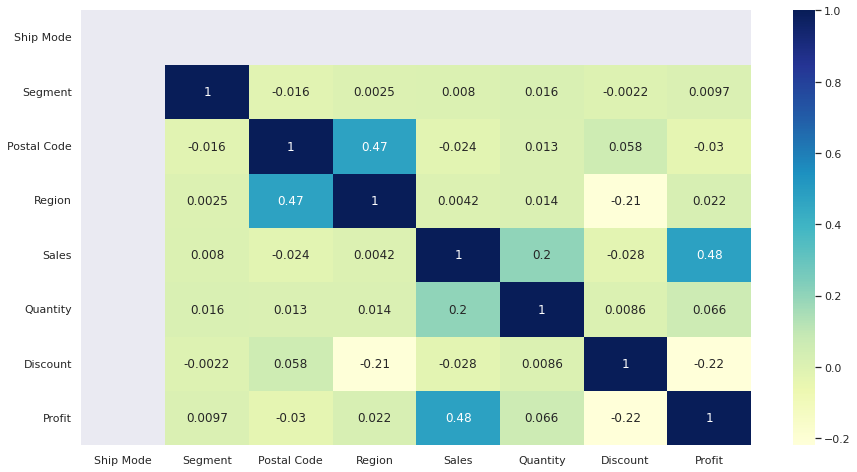

In [83]:
import seaborn as sns # data visualization
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

# THANK YOU, FOR YOUR ATTENTION !

                                                                EDA made by, KILINDO BULAMBO Vainqueur
                                                                Burundi/Rutovu, 12/09 till 14/09/2022         